In [1]:
import yfinance as yf

In [2]:
stock = yf.Ticker("AMZN") 
data = stock.history(start="2015-01-01", end="2025-01-01", auto_adjust=False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-01-02 00:00:00-05:00,15.6290,15.7375,15.3480,15.4260,15.4260,55664000,0.0,0.0
2015-01-05 00:00:00-05:00,15.3505,15.4190,15.0425,15.1095,15.1095,55484000,0.0,0.0
2015-01-06 00:00:00-05:00,15.1120,15.1500,14.6190,14.7645,14.7645,70380000,0.0,0.0
2015-01-07 00:00:00-05:00,14.8750,15.0640,14.7665,14.9210,14.9210,52806000,0.0,0.0
2015-01-08 00:00:00-05:00,15.0160,15.1570,14.8055,15.0230,15.0230,61768000,0.0,0.0


In [4]:
data.head(-10)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-01-02 00:00:00-05:00,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,0.0,0.0
2015-01-05 00:00:00-05:00,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,0.0,0.0
2015-01-06 00:00:00-05:00,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,0.0,0.0
2015-01-07 00:00:00-05:00,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,0.0,0.0
2015-01-08 00:00:00-05:00,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-12-10 00:00:00-05:00,226.089996,229.059998,224.199997,225.039993,225.039993,31199900,0.0,0.0
2024-12-11 00:00:00-05:00,226.410004,231.199997,226.259995,230.259995,230.259995,35385800,0.0,0.0
2024-12-12 00:00:00-05:00,229.830002,231.089996,227.630005,228.970001,228.970001,28204100,0.0,0.0


In [5]:
 data.shape

(2516, 8)

In [6]:
print("Null values:", data.isnull().values.sum())

Null values: 0


In [7]:
import pandas as pd

In [8]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Adj Close     2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   Dividends     2516 non-null   float64
 7   Stock Splits  2516 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 176.9 KB


In [10]:
data.reset_index(inplace=True)

In [11]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

In [12]:
stock_df_close = data[['Date','Close']]

print("Shape of close dataframe:", stock_df_close.shape)

Shape of close dataframe: (2516, 2)


In [13]:
# Taking only only last 1 year data for prediction
stock_df_close_last_1_year = stock_df_close[stock_df_close['Date'] > '2024-01-01']

stock_df_close_last_1_year_original_gt = stock_df_close_last_1_year.copy()

print("Total data for prediction: ",stock_df_close_last_1_year.shape[0])

Total data for prediction:  252


In [14]:
import matplotlib.pyplot as plt

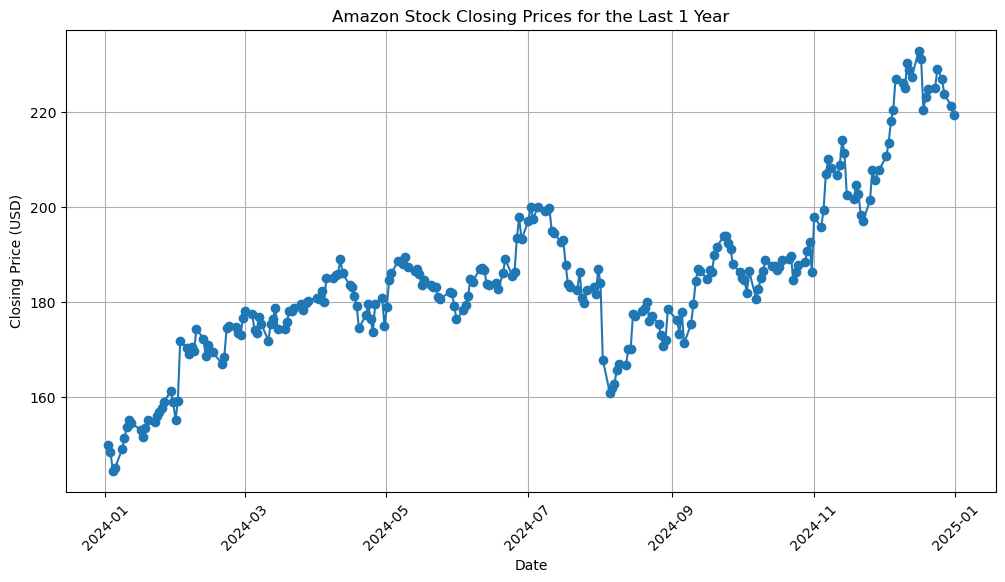

In [15]:
# Plot the closing prices for the last year
plt.figure(figsize=(12, 6))
plt.plot(stock_df_close_last_1_year['Date'], stock_df_close_last_1_year['Close'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Amazon Stock Closing Prices for the Last 1 Year")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
training_size = int(len(stock_df_close_last_1_year)*0.80)

test_size = len(stock_df_close_last_1_year)-training_size

train_data,test_data = stock_df_close_last_1_year[0:training_size],stock_df_close_last_1_year[training_size:len(stock_df_close_last_1_year)]

print("train_data: ", train_data.shape)

print("test_data: ", test_data.shape)

train_data:  (201, 2)
test_data:  (51, 2)


In [17]:
# Need to delte the 'date' column else will get below error
# float() argument must be a string or a number, not 'Timestamp'
del train_data['Date']
del test_data['Date']

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(np.array(train_data).reshape(-1,1))

test_data = scaler.transform(np.array(test_data).reshape(-1,1))

print(stock_df_close_last_1_year.shape)

(252, 2)


In [19]:
print(train_data.shape) 
print(test_data.shape)

(201, 1)
(51, 1)


In [20]:
# convert an array of values into a dataset matrix
def create_sliding_window(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 15
X_train, y_train = create_sliding_window(train_data, time_step)
X_test, y_test = create_sliding_window(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (185, 15)
y_train:  (185,)
X_test:  (35, 15)
y_test (35,)


In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# Or in terms of TensorFlow / Keras => [batch_size, time steps, input_dim].
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (185, 15, 1)
X_test:  (35, 15, 1)


In [26]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [27]:
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 15, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 15, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,065 (62.75 KB)

 Trainable params: 16,065 (62.75 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.3248 - val_loss: 0.6233
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0763 - val_loss: 0.0575
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - val_loss: 0.0406
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0279 - val_loss: 0.1822
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0197 - val_loss: 0.2041
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184 - val_loss: 0.1255
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0177 - val_loss: 0.0800
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0166 - val_loss: 0.1120
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132 - val_loss: 0.1384
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0164 - val_loss: 0.1123
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - val_loss: 0.1001
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0098 - val_loss: 0.1048
E

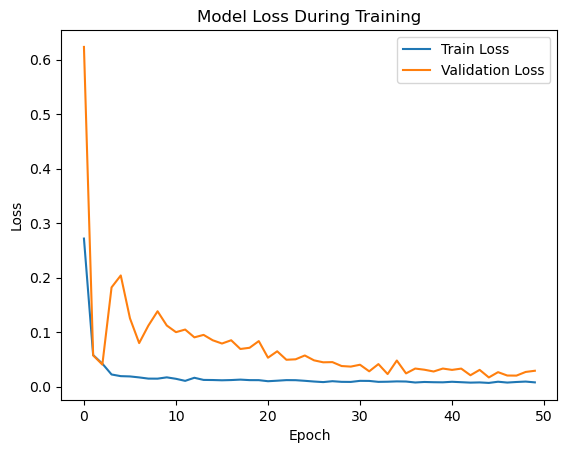

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [34]:
train_predict.shape, test_predict.shape

((185, 1), (35, 1))

In [35]:
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

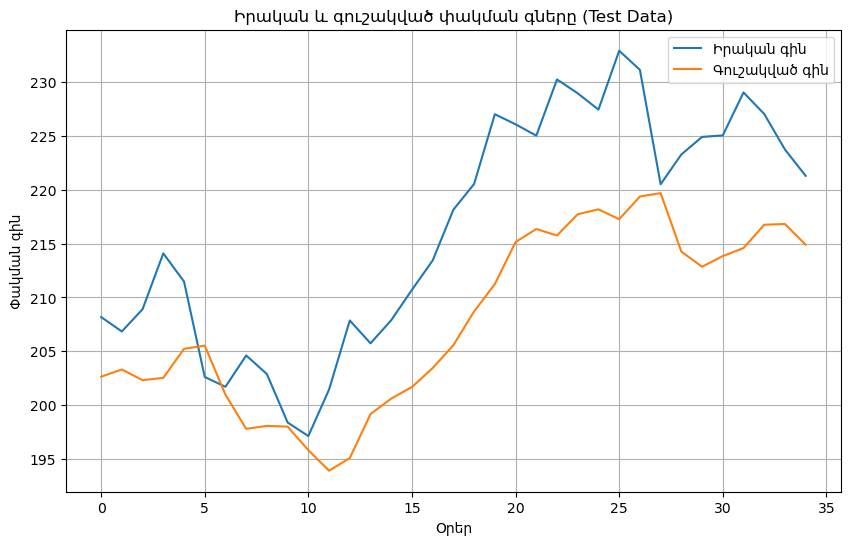

In [36]:
import matplotlib.pyplot as plt

# Հետևենք միայն թեստի արդյունքներին
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Իրական գին')
plt.plot(test_predict, label='Գուշակված գին')
plt.title('Իրական և գուշակված փակման գները (Test Data)')
plt.xlabel('Օրեր')
plt.ylabel('Փակման գին')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_actual, train_predict)))
print("Train data MSE: ", mean_squared_error(y_train_actual, train_predict))
print("Train data MAE: ", mean_absolute_error(y_train_actual, train_predict))

print("-------------------------------------------------------------------------------------")

print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_actual, test_predict)))
print("Test data MSE: ", mean_squared_error(y_test_actual, test_predict))
print("Test data MAE: ", mean_absolute_error(y_test_actual, test_predict))


Train data RMSE:  3.7352105258853325
Train data MSE:  13.951797672684581
Train data MAE:  2.802235948717272
-------------------------------------------------------------------------------------
Test data RMSE:  9.479505396560434
Test data MSE:  89.8610225634184
Test data MAE:  8.490836443219866
